# Ensemble Learning

In [ ]:
-->It is the wisdom of the crowd. 

-->This technique of combining multiple weak classifiers instead of a strong classifier is called as ensemble learning.

-->There are two techniques : 
1)Bagging Classifier : there two techniques :
                       1)voting : Same data set is provided with the diff algorithm then we will take avg.
                       2)Bagging : we have to select only one algorithm but we can consider the multiple insentives
                                   for that to provide the diff sample.
    
2)Boosting Classifer 

# Random Forest Classifier

In [ ]:
-->It is a group of decision tree. It works on row and column sampling. It is a part od bagging.

# Bagging

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
df=pd.read_csv('bank.csv')
df.shape

(11162, 17)

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [7]:
df.deposit.value_counts()

deposit
0    5873
1    5289
Name: count, dtype: int64

In [8]:
x=df.iloc[:, :-1]
y=df.iloc[:, -1]

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=1)

# voting Classifier

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [24]:
dt_clf=DecisionTreeClassifier()
log_clf=LogisticRegression()
svm_clf=SVC()

In [25]:
voting_clf=VotingClassifier(estimators=[('lr', log_clf), ('dt', dt_clf), ('svm', svm_clf)])

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
voting_clf.fit(xtrain,ytrain)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()), ('svm', SVC())])

In [28]:
from sklearn.metrics import accuracy_score

In [30]:
for clf in (log_clf, dt_clf, svm_clf, voting_clf):
    clf.fit(xtrain,ytrain)
    y_pred=clf.predict(xtest)
    print(clf.__class__.__name__,accuracy_score(ytest,y_pred))

LogisticRegression 0.7659002687369364
DecisionTreeClassifier 0.7868020304568528
SVC 0.7414153478650344
VotingClassifier 0.7802329053448791


In [31]:
clf.fit(xtrain,ytrain)
y_pred=clf.predict(xtest)
print(clf.__class__.__name__,accuracy_score(ytest,y_pred))

VotingClassifier 0.7805315019408778


# Bagging Classifier

In [33]:
from sklearn.ensemble import BaggingClassifier

In [34]:
bag_clf=BaggingClassifier(log_clf, n_estimators=15)
# bag_clf = BaggingClassifier(svm_clf,n_estimators=15)


In [35]:
bag_clf.fit(xtrain,ytrain)

BaggingClassifier(estimator=LogisticRegression(), n_estimators=15)

In [36]:
y_pred=bag_clf.predict(xtest)
accuracy_score(y_pred,ytest)

0.7685876381009257

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
my_rd_classifier=RandomForestClassifier()

In [38]:
my_rd_classifier.fit(xtrain,ytrain)

RandomForestClassifier()

In [39]:
my_predictions=my_rd_classifier.predict(xtest)

In [40]:
print(accuracy_score(ytest,y_pred))

0.7685876381009257


In [42]:
print(classification_report(ytest,my_predictions))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1760
           1       0.81      0.88      0.84      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



# Hyperparameter Tunning

In [43]:
my_rd_classifier1=RandomForestClassifier(n_estimators=200,max_features=5,criterion='entropy')
my_rd_classifier1.fit(xtrain,ytrain)
my_predictions=my_rd_classifier.predict(xtest)
print(classification_report(ytest,my_predictions))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1760
           1       0.81      0.88      0.84      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



In [46]:
from sklearn.model_selection import GridSearchCV

params={'criterion' : ['gini', 'entropy'],
         'n_estimators' : [150,200,250],
          'max_features' : [5,10,15]
       }

grid_search=GridSearchCV(my_rd_classifier,param_grid=params)

In [47]:
grid_search.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [5, 10, 15],
                         'n_estimators': [150, 200, 250]})

In [52]:
grid_search.best_params_

{'criterion': 'entropy', 'max_features': 15, 'n_estimators': 200}

In [54]:
my_best_preds = grid_search.predict(xtest)

In [55]:
print(classification_report(ytest, my_best_preds))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1760
           1       0.82      0.88      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



In [56]:
from sklearn import metrics

In [57]:
metrics.confusion_matrix(ytest,my_best_preds)

array([[1450,  310],
       [ 198, 1391]], dtype=int64)

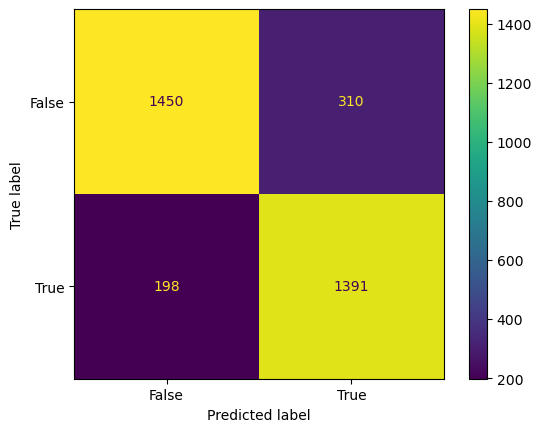

In [61]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix=metrics.confusion_matrix(ytest,my_best_preds)
confusion_matrix=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False,True])

confusion_matrix.plot()
plt.show()
